<a href="https://colab.research.google.com/github/NageshwarPrasad/Ice-Cream-Revenue-Predictor/blob/main/Ice_Cream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.
Data set:

Independant variable X: Outside Air Temperature

Dependant variable Y: Overall daily revenue generated in dollars

                       STEP 1:Import files

In [1]:
from google.colab import files
uploaded=files.upload()

Saving IceCreamData.csv to IceCreamData.csv


                 STEP 2:Import Libraries

In [32]:
import pandas as pd ####Pandas library provides a range of functions to manipulate data, including filtering, sorting, grouping, joining, merging, and reshaping data.
import numpy as np ####NumPy is an open-source Python library that provides support for large, multi-dimensional arrays and matrices. It also have a collection of high-level mathematical functions to operate on arrays.
import seaborn as sns ####Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
import matplotlib.pyplot as plt #### Pyplot is an API (Application Programming Interface) for Python's matplotlib that effectively makes matplotlib a viable open source alternative to MATLAB.

             STEP 3: Import dataset

In [3]:
IceCream = pd.read_csv('IceCreamData.csv')

In [4]:
IceCream.head(100)  ####.head is used to take data of top 100 rows

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [5]:
IceCream.tail() ####.tail() is used to take data from bottom of page

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
IceCream.describe()  ####describe() The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream.info()   ####used to provide the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


         STEP3: VISUALIZE DATASET

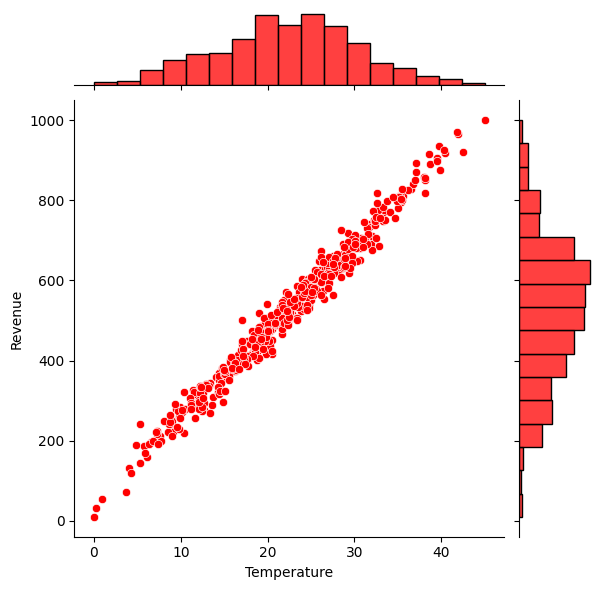

In [10]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'red') ####Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.

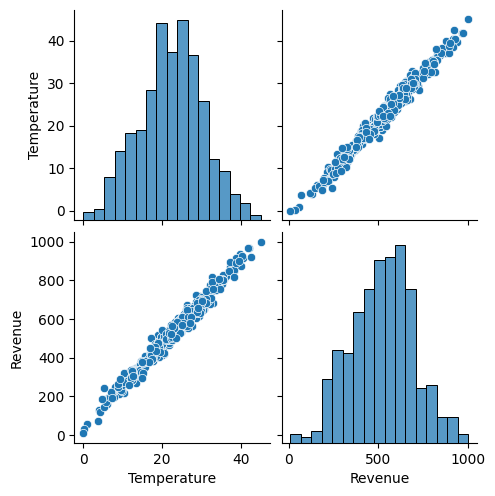

In [14]:
sns.pairplot(IceCream) ####pairplot() : To plot multiple pairwise bivariate distributions in a dataset, it can be used to  the . pairplot() function.

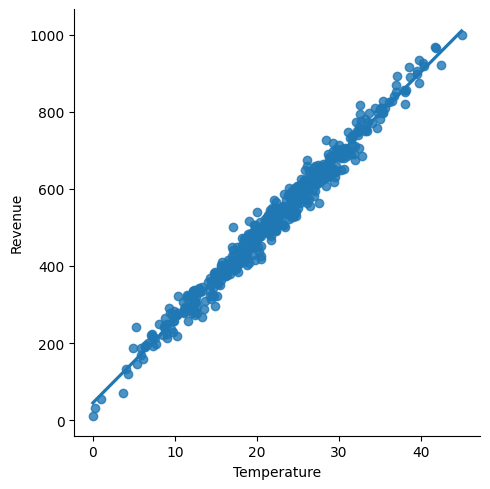

In [15]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream) ####lmplot() method is used to draw a scatter plot onto a FacetGrid.FacetGrid is also an library

           STEP 4: CREATE TESTING AND TRAINING DATASET

In [13]:
y = IceCream['Revenue'] #### Let y be a variable for Revenue

In [16]:
X = IceCream[['Temperature']] ####Let X be a variable. please always take X in capital

In [18]:
X #### taking data of x

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [19]:
from sklearn.model_selection import train_test_split #### sklearn is a library. It uses a Python consistency interface to provide a set of efficient tools for statistical modeling and machine learning, like classification, regression, clustering, and dimensionality reduction.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

         STEP 5: TRAIN THE MODEL

In [21]:
X_train.shape #### The concept of train-test split is crucial in machine learning as it allows for a clear evaluation of a model's performance on unseen data.

(375, 1)

In [23]:
from sklearn.linear_model import LinearRegression ####import LinearRegression: This part of the code specifically imports the LinearRegression class. Think of a class as a blueprint for creating objects. In this case, the LinearRegression class provides the tools to build and use a linear regression model.

In [24]:
regressor = LinearRegression(fit_intercept = True)

In [25]:
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.4329205]
Linear Model Coefficient (b):  45.55033939683858


        STEP 6: TEST THE MODEL

In [27]:
y_predict = regressor.predict( X_test)
y_predict

array([863.97068133, 635.31241846, 695.61792681, 565.09231543,
       386.69122973, 673.79237407, 610.0302914 , 663.45627378,
       136.35015636, 759.58803483, 570.06603232, 697.27433578,
       556.18800646, 662.54915629, 431.27892705, 531.61811507,
       124.0949111 , 671.59983538, 873.47967685, 185.77553034,
       559.06836401, 547.31346911, 540.3864015 , 803.41327701,
       631.14751119, 666.19919979, 510.729436  , 621.52977682,
       364.83596389, 652.07390748, 450.8144734 , 473.72580804,
       605.42403893, 805.23048068, 630.26321161,  45.5503394 ,
       697.70678289, 640.96757727, 394.90962201, 838.5058982 ,
       863.13765701, 956.77696445, 304.55863897, 159.96811381,
       442.23855622, 657.41708398, 415.52929499, 317.50044335,
       581.42435538, 677.99712771, 796.41962375, 724.31945601,
       627.012867  , 468.23606937, 557.405448  , 458.16950285,
       436.34166214, 460.55926813, 262.44585521, 420.99239318,
       606.91428104, 682.19773279, 456.46325527, 416.32

In [28]:
y_test

,Revenue
348,856.303304
417,649.729072
189,691.958006
400,569.618756
435,381.043377
...,...
291,631.318237
300,170.237756
204,186.476487
193,542.608070


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

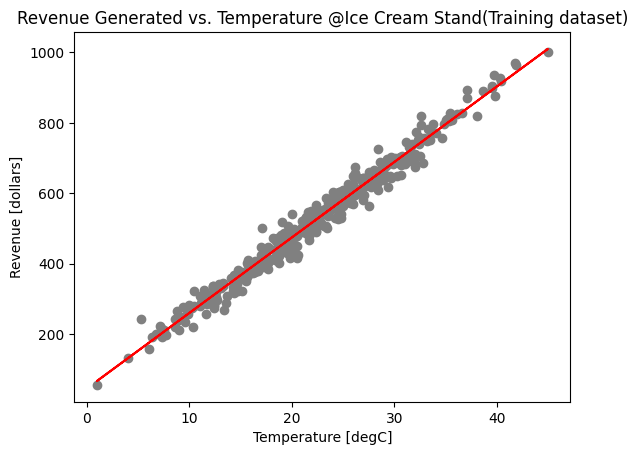

In [33]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

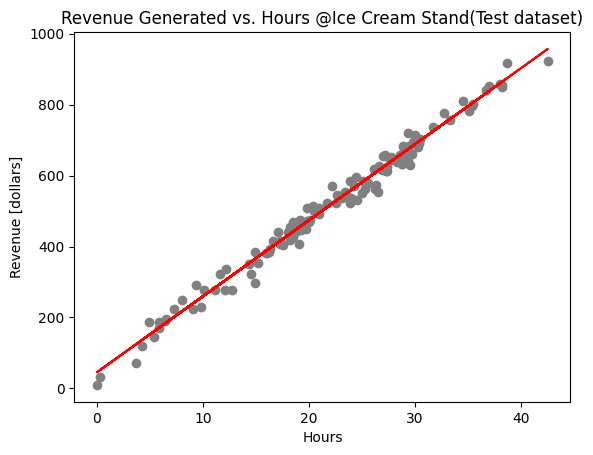

In [34]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [36]:
y_predict = regressor.predict([[30]])
y_predict
#### predict in Action: Once the model is trained, it's ready to make predictions. This is where predict comes in. It's a method (a function associated with an object) that belongs to the regressor object (which represents our Linear Regression model).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([688.53795439])

          THANK YOU